# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

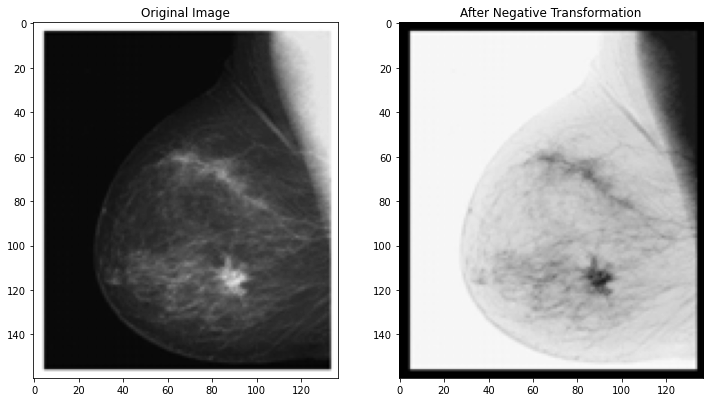

In [3]:
'''
1
Negative Transformation
'''
def run_negative_transformation(img):
    def negative(x, threshold=255):
        return threshold - x

    image = (io.imread(img, as_gray=True) * 255).astype(np.uint8)
    neg = negative(image)
    show_images([image, neg], ['Original Image', 'After Negative Transformation'])

run_negative_transformation('imgs/Picture1.png')

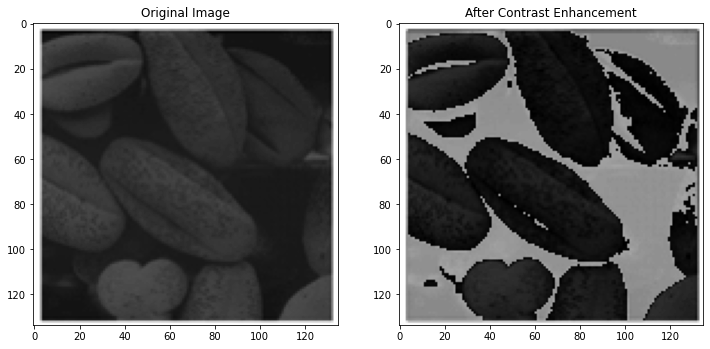

In [4]:
'''
2
Contrast Enhancement
'''
def run_contrast_enhancement(img):
    def contrast_enhancement(x):
        return np.where(x <= 100, 50 + (3/2) * x, x)

    image = (io.imread(img, as_gray=True) * 255).astype(np.uint8)
    contrast = contrast_enhancement(image)
    show_images([image, contrast], ['Original Image', 'After Contrast Enhancement'])

run_contrast_enhancement('imgs/Picture2.png')


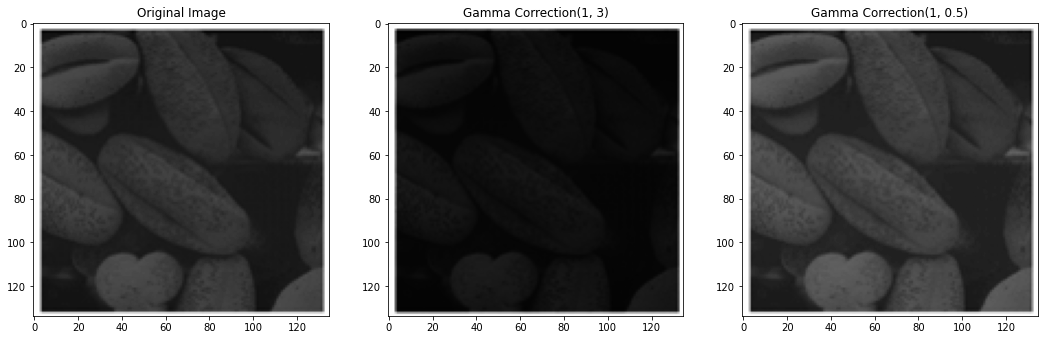

In [5]:
'''
3
Gamma Correction
'''
def run_gamma_correction(img):
    def gamma_correction(x, c, gamma):
        return c * (x ** gamma)
    
    image = io.imread(img, as_gray=True)
    gamma1 = gamma_correction(image, 1, 3)
    gamma2 = gamma_correction(image, 1, 0.5)
    show_images([image, gamma1, gamma2], ['Original Image', 'Gamma Correction(1, 3)', 'Gamma Correction(1, 0.5)'])

run_gamma_correction('imgs/Picture2.png')


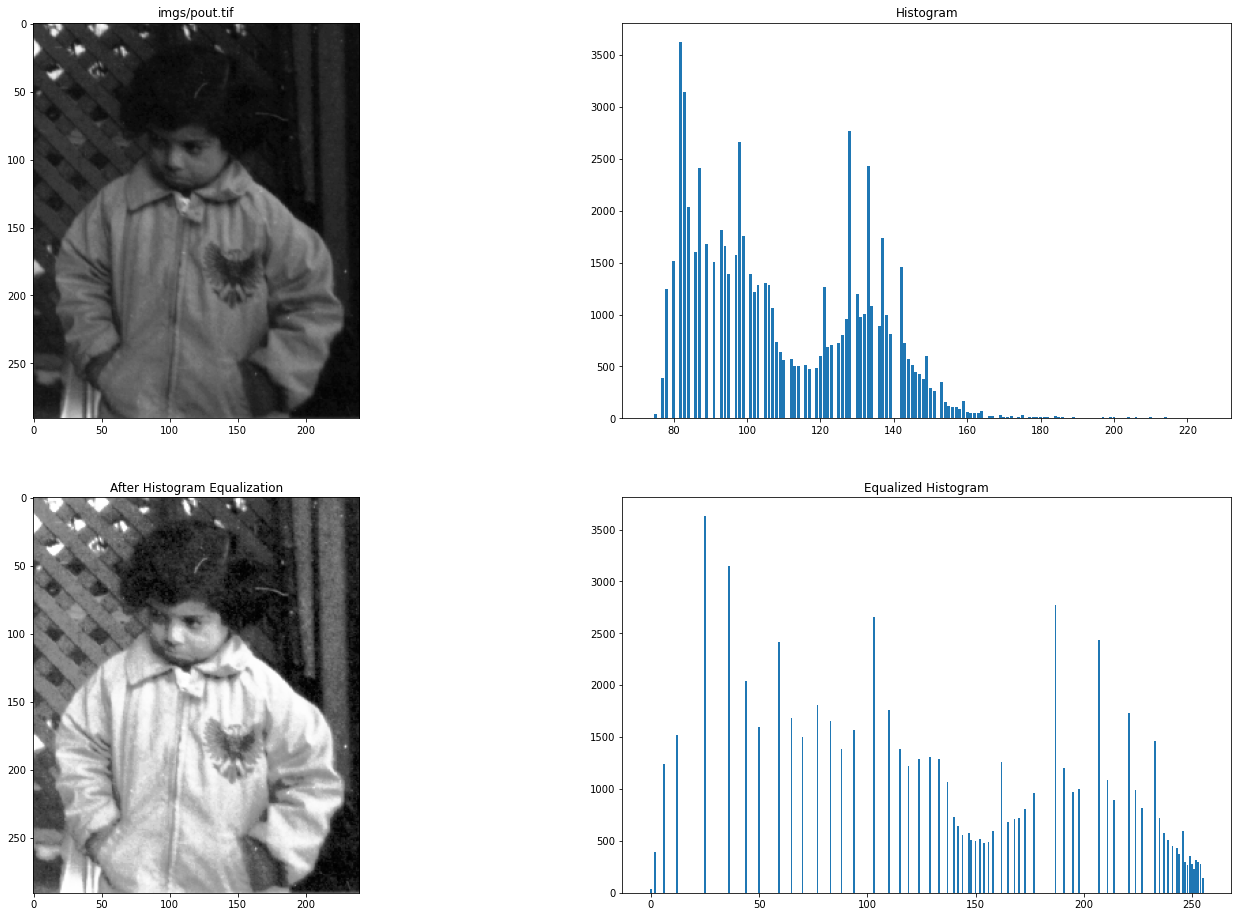

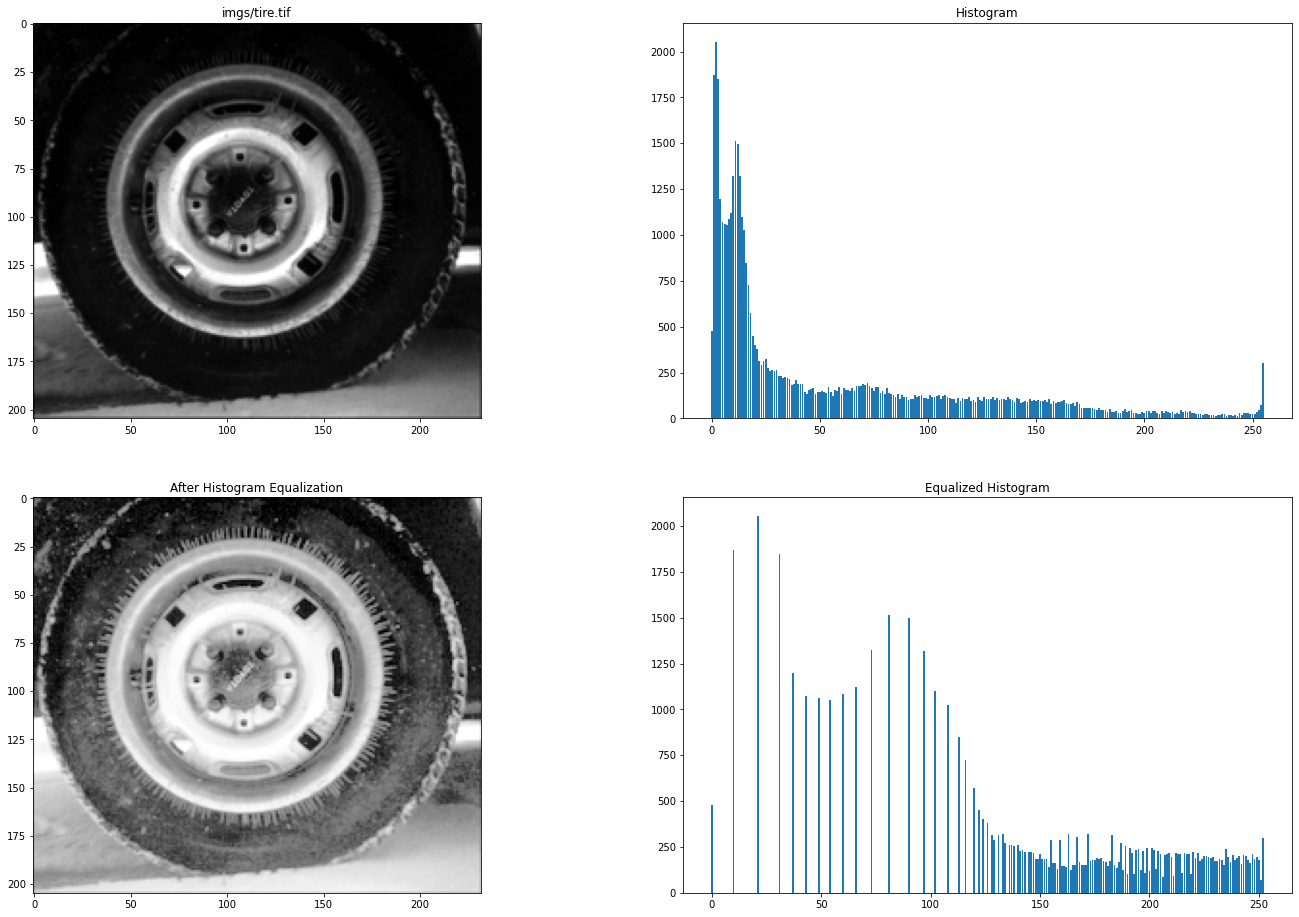

In [6]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
# ext: extension??
def getImageWithHist(name, ext, nbins=256):
    def histogram_equalization(image, nbins):
        hist = np.array(histogram(image, nbins))

        # Calculate the histogram's CDF
        cumulativeHist = np.zeros(nbins, dtype=int)
        for g in range(1, nbins):
            cumulativeHist[g] = cumulativeHist[g-1]
            graylevel = g * (256//nbins)
            if graylevel in hist[1]: cumulativeHist[g] += hist[0, np.searchsorted(hist[1], graylevel)]

        # Vectorize the function
        def c_hst(g):
            reducedGraylevel = (g * nbins) // 256
            return cumulativeHist[reducedGraylevel]
        c_hst = np.vectorize(c_hst)

        eqImage = np.around(((nbins-1) * c_hst(image)) / image.size).astype(np.uint8)
        eqHist = np.array(histogram(eqImage, nbins))

        return hist, eqImage, eqHist
    
    image = io.imread(name + f'.{ext}', as_gray=True)
    hist, eqImage, eqHist = histogram_equalization(image, nbins)
    fig = plt.figure()
    
    plt.subplot(221).title.set_text(f'{name}.{ext}')
    plt.imshow(image)
    
    plt.subplot(222).title.set_text('Histogram')
    plt.bar(hist[1].astype(np.uint8), hist[0], width=0.8, align='center')

    plt.subplot(223).title.set_text('After Histogram Equalization')
    plt.imshow(eqImage)
    
    plt.subplot(224).title.set_text('Equalized Histogram')
    plt.bar(eqHist[1].astype(np.uint8), eqHist[0], width=0.8, align='center')

    fig.set_size_inches(np.array(fig.get_size_inches()) * 4)    
    plt.show()

getImageWithHist('imgs/pout', 'tif')
getImageWithHist('imgs/tire', 'tif')

